# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/real_estate_data.csv')
print(df.head(15))

   total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0   20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1   7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2   10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...           

Названия столбцов склеились в одну строку. Выполним разделение на столбцы и строки:

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь, когда таблица отображается корректно, изучим информацию, содержащуюся в таблице:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Рассмотрим полученную информацию.

Всего в таблице 22 столбца и 23699 записей (строк):

airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
balcony — число балконов;
ceiling_height — высота потолков (м);
cityCenters_nearest — расстояние до центра города (м);
days_exposition — сколько дней было размещено объявление (от публикации до снятия);
first_day_exposition — дата публикации;
floor — этаж;
floors_total — всего этажей в доме;
is_apartment — апартаменты (булев тип);
kitchen_area — площадь кухни в квадратных метрах (м²);
last_price — цена на момент снятия с публикации;
living_area — жилая площадь в квадратных метрах(м²);
locality_name — название населённого пункта;
open_plan — свободная планировка (булев тип);
parks_around3000 — число парков в радиусе 3 км;
parks_nearest — расстояние до ближайшего парка (м);
ponds_around3000 — число водоёмов в радиусе 3 км;
ponds_nearest — расстояние до ближайшего водоёма (м);
rooms — число комнат;
studio — квартира-студия (булев тип);
total_area — площадь квартиры в квадратных метрах (м²);
total_images — число фотографий квартиры в объявлении.

Каждая строка таблицы содержит общую информацию о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Наименование столбца 'cityCenters_nearest' в датафрейме указано некорректно. Количество значений в столбцах также различается, что означает наличие в таблице пропущенных значений. Таким образом, на следующем этапе по предобработке данных будет рассмотрена проблема пропущенных значений и подготовка данных для дальнейшей работы.

### Шаг 2. Предобработка данных

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
df.set_axis(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'], axis = 'columns', inplace=True)

Теперь названия всех столбцов таблицы имеют корректный вид.

In [7]:
df.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Имеются пропущенные значения в 14 столбцах из 22: 
ceiling_height — высота потолков (м);
floors_total — всего этажей в доме;
living_area — жилая площадь в квадратных метрах(м²);
is_apartment — апартаменты (булев тип);
kitchen_area — площадь кухни в квадратных метрах (м²);
balcony — число балконов;
locality_name — название населённого пункта;
airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
city_сenters_nearest — расстояние до центра города (м);
parks_around3000 — число парков в радиусе 3 км;
parks_nearest — расстояние до ближайшего парка (м);
ponds_around3000 — число водоёмов в радиусе 3 км;
ponds_nearest — расстояние до ближайшего водоёма (м);
days_exposition — сколько дней было размещено объявление (от публикации до снятия).

#### Заполнение пропущенных значений

Предположим, что отсутствие информации в столбце о количестве балконов (balcony) означает их отсутствие. Заполним пропущенные значения:

In [8]:
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [9]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Приведем к нижнему регистру наименования населенных пунктов (locality_name)

In [10]:
df['locality_name'] = df['locality_name'].str.lower()

In [11]:
print(df['locality_name'].head(5))

0    санкт-петербург
1     посёлок шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name, dtype: object


In [12]:
df['locality_name'].value_counts()

санкт-петербург                      15721
посёлок мурино                         522
посёлок шушары                         440
всеволожск                             398
пушкин                                 369
                                     ...  
посёлок петро-славянка                   1
садовое товарищество приладожский        1
поселок пансионат зелёный бор            1
поселок коробицыно                       1
деревня пикколово                        1
Name: locality_name, Length: 364, dtype: int64

Исключим из df 49 строк с отсутствующей информацией о населенном пункте

In [13]:
df.dropna(subset = ['locality_name'], inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centers_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Для студий с неизвестными значениями в столбце с кухонной площадью (kitchen_area), значение площади кухни укажем равным 0.

In [15]:
df['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

In [16]:
df.query('studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,0.0,посёлок шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,0.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,...,NaN,0.0,санкт-петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,...,NaN,0.0,санкт-петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,0.0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [17]:
df.loc[(df['studio'] == True), 'kitchen_area'] = 0

Для остальных квартир, где площадь кухни неизвестна, укажем медианную площадь в зависимости от количества комнат, исходя из того, что в среднем все квартиры равнозначны.

In [18]:
df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'), inplace = True)

Для пропущенных значений в столбце с количеством этажей в доме (floors_total) установим значение, равное этажу квартиры. Данное предположение основано на том, что пользователь не стал указывать дважды одно и то же значение.

In [19]:
df['floors_total'].fillna(df['floor'], inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centers_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Для расчета цены квадратного метра нелобходимо восстановить значения в столбце с жилой площадью в квадратных метрах(м²) (living_area)

In [21]:
df.groupby('rooms')['living_area'].count()

rooms
0      183
1     7378
2     7282
3     5351
4     1084
5      292
6       99
7       53
8       12
9        7
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: living_area, dtype: int64

А вот и очередная проблема. Для 183 квартир количество комнат указано 0. Данная аномалия будет рассмотрена более подробно.

In [22]:
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,0.0,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,0.0,0.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,0.0,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,0.0,1.0,посёлок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,0.0,0.0,посёлок шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,0.0,0.0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,0.0,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,0.0,0.0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,0.0,2.0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Из среза видно, что квартиры с количеством комнат, равным 0, имеют малую площадь. Значит при занесении информации была допущена ошибка и это, скорее всего, однокомнатные квартиры, либо однокомнатные квартиры-студии.

In [23]:
df.loc[(df['rooms'] == 0), 'rooms'] = 1

Проверка выполнения замены:

In [24]:
df.groupby('rooms')['living_area'].count()

rooms
1     7561
2     7282
3     5351
4     1084
5      292
6       99
7       53
8       12
9        7
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: living_area, dtype: int64

In [25]:
df.query('rooms >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,...,13.3,0.0,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,0.0,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,...,18.8,1.0,санкт-петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,0.0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,...,11.9,0.0,санкт-петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.6,0.0,санкт-петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18119,4,15500000.0,216.1,2016-07-04T00:00:00,10,3.15,5.0,161.4,2,NaN,...,19.8,0.0,санкт-петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,...,13.0,1.0,санкт-петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21T00:00:00,10,3.50,6.0,189.4,6,NaN,...,30.0,1.0,санкт-петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,0.0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [26]:
df.groupby('rooms')['living_area'].agg(['count', 'mean', 'median'])

,count,mean,median
rooms,,,
1,7561,17.916281,17.600
2,7282,31.732152,30.500
3,5351,47.373498,45.000
4,1084,67.042002,63.800
5,292,100.009247,91.785
6,99,130.983636,123.900
7,53,163.564151,145.000
8,12,168.683333,161.000
9,7,190.257143,179.200


In [27]:
df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'), inplace = True)

In [28]:
df.groupby('rooms')['living_area'].agg(['count', 'mean', 'median'])

,count,mean,median
rooms,,,
1,8233,17.890465,17.600
2,7924,31.632324,30.500
3,5797,47.190890,45.000
4,1175,66.790919,63.800
5,326,99.151503,91.785
6,105,130.578857,123.900
7,59,161.676271,145.000
8,12,168.683333,161.000
9,8,188.875000,179.200


Аналогичным способом восстановим пропущенные значения в столбце с высотой потолков (ceiling_height)

In [29]:
df['ceiling_height'].fillna(df.groupby('rooms')['ceiling_height'].transform('median'), inplace = True)

In [30]:
df.groupby('rooms')['ceiling_height'].agg(['count', 'mean', 'median'])

,count,mean,median
rooms,,,
1,8233,2.691648,2.650
2,7924,2.695627,2.600
3,5797,2.730876,2.650
4,1175,2.885140,2.800
5,326,3.150613,3.100
6,105,3.236762,3.200
7,59,3.404407,3.380
8,12,3.423333,3.420
9,8,3.081250,3.200


In [31]:
df.loc[(df['rooms'] == 19), 'ceiling_height'] = 3.5

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centers_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

In [33]:
#df.head(50)

Для оставшихся незаполненных значений, в т.ч. для значений, полученных автоматически на основе картографических данных, оставим незаполненные ячейки пустыми.

#### Приведение данных к нужным типам

Из информации о датафрейме можно заметить, что в столбцах с ценой на момент снятия с публикации (last_price), колчеством балконов (balcony), количеством этажей в доме (floors_total) тип данных float64. Заменим в данных столбцах вещественный тип данных (float64) на целочисленный (int64).

In [34]:
df[['last_price', 'balcony', 'floors_total']] = df[['last_price', 'balcony', 'floors_total']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centers_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000     

#### Поиск и удаление дубликатов

После преобразований выполним проверку данный датафрейма на наличие дубликатов

In [35]:
print(df.duplicated().sum())

0


Дубликатов в датафрейме не обнаружено.

In [36]:
df = df.reset_index(drop = True)
#df.info()

Кроме того, для дальнейшей работы с датой, изменим тип данных в столбце first_day_exposition с 'object' на 'datetime64'.

In [37]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,11.0,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,NaN,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,...,9.5,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centers_nearest    18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3

**Вывод**

На первом этапе было важно корректно подготовить данные для выполнения дальнейшей работы и решения поставленных задач. Были выполнены следующие шаги:

1.	Выполнено приведение наименований столбцов к корректному виду;

2.	Текстовые данные в таблице приведены к единому нижнему регистру;

3.	Выполнено восстановление пропущенных значений в столбцах с количеством балконов,  площадью кухни, количеством этажей в доме, жилой площадью в квадратных метрах(м²), высотой потолков.
Значения в столбцах с количеством балконов и количеством этажей в доме были восстановлены на основании логических рассуждений и предположений. В остальных столбцах для восстановления значений применялся средний показатель из предположения, что квартиры в среднем имеют схожие параметры. Однако, т.к. крайние значения по столбцу нередко отличались существенно, для восстановления средних значений была применена медиана. Наиболее вероятная причина появления пропущенных значений в данных столбцах – человеческий фактор на этапе занесения данных по недвижимости.
4.	Для оставшихся пропущенных значений, для которых отсутствуют подходящие значения на замену, в т.ч. для значений, полученных автоматически на основе картографических данных -  незаполненные ячейки оставлены пустыми.
5.	Исправлена аномалия с квартирами, для которых количество комнат было указано равным 0 (нулю);
6.	Исключено 49 строк с отсутствующей информацией о населенном пункте;
7.	Выполнена проверка данных датафрейма на наличие дубликатов – дубликатов не обнаружено;
8.	В столбцах с ценой на момент снятия с публикации (last_price), колчеством балконов (balcony), количеством этажей в доме (floors_total) вещественный тип данных (float64) изменен на целочисленный (int64) (с использованием метода astype()). Кроме того, тип данных в столбце с датой размещения объявления (first_day_exposition) с использованием метода to_datetime() был изменен с 'object' на 'datetime64' – это особенно важно для возможности выполнения операций с датой во второй части проектной работы.


### Шаг 3. Посчитайте и добавьте в таблицу

#### Добавим в таблицу столбец с ценой квадратного метра

In [39]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
#df.head(5)

In [40]:
df['price_per_square_meter'] = df['price_per_square_meter'].round().astype('int')
#df.head(15)

#### День недели публикации объявления:

In [41]:
df['weekday'] = df['first_day_exposition'].dt.weekday

#### Месяц публикации объявления:

In [42]:
df['month'] = df['first_day_exposition'].dt.month

#### Год публикации объявления:

In [43]:
df['year'] = df['first_day_exposition'].dt.year

In [44]:
#df.head(5)

#### Информация о этаже квартиры: первый, последний, другой

In [45]:
df.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year


In [46]:
#df['floor'].value_counts()

In [47]:
df.loc[(df['floor'] == df['floors_total']), 'floors_group'] = 'последний'
df.loc[(df['floor'] == 1), 'floors_group'] = 'первый'
df.loc[(df['floor'] != 1) & (df['floor'] != df['floors_total']), 'floors_group'] = 'другой'
df['floors_group'].value_counts()

другой       17326
последний     3412
первый        2912
Name: floors_group, dtype: int64

#### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [48]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

In [49]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [50]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_group,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,0.0,NaN,81.0,82921,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,NaN,...,2.0,574.0,558.0,92786,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,NaN,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.283019,0.059748
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,55.0,95066,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,0.0,NaN,155.0,99196,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.60,24,30.50,22,NaN,...,0.0,NaN,NaN,110545,3,4,2019,другой,0.425978,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,NaN,NaN,189.0,87455,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289.0,88525,6,2,2017,другой,0.714754,0.106557


**Вывод**

В соответствии с заданием к проекту, на данном этапе в таблицу добавлены столбцы, содержащие следующие значения:
1. цену квадратного метра - найдена расчетным методом путем деления стоимости квартиры на момент снятия объявления с публикации на общую площадь квартиры;
2. день недели, месяц и год публикации объявления - значения определены с применением метода datetime (атрибут dt);
3. этаж квартиры: первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

Данная информация необходима для выполнения дальнейшего анализа с определением факторов, влияющих на стоимость квартиры.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограммы для каждого параметра.

In [51]:
import matplotlib.pyplot as plt

In [52]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

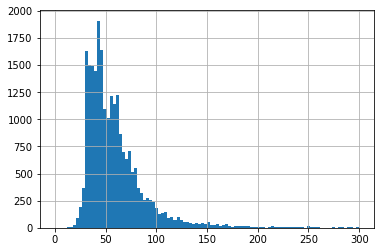

In [53]:
df['total_area'].hist(bins = 100, range = (0, 300))

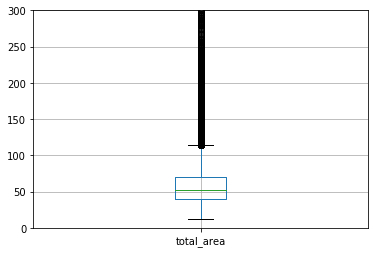

In [54]:
df.boxplot(column='total_area')
plt.ylim(0, 300)
plt.show()

В архиве объявлений преобладают квартиры с площадью 40-45 кв.м. Медиана общей площади квартир составляет 52 кв.м. Стандартное отклонение показывает значительный разброс в площади квартир.

In [55]:
df['price_per_square_meter'].describe()

count    2.365000e+04
mean     9.943225e+04
std      5.033793e+04
min      1.120000e+02
25%      7.661500e+04
50%      9.500000e+04
75%      1.142740e+05
max      1.907500e+06
Name: price_per_square_meter, dtype: float64

In [56]:
df['price_per_square_meter'].min()

112

In [57]:
#df.query('price_per_square_meter < 25000')

In [58]:
df['price_per_square_meter'].median()

95000.0

In [59]:
df['price_per_square_meter'].max()

1907500

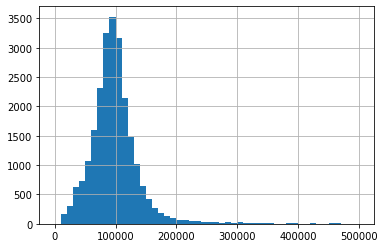

In [60]:
df['price_per_square_meter'].hist(bins = 50, range = (0, 500000))

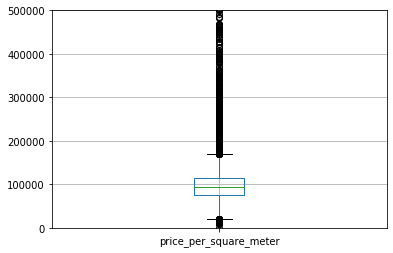

In [61]:
df.boxplot(column='price_per_square_meter')
plt.ylim(0, 500000)
plt.show()

Набольшее количество предложений - квартиры стоимостью около 4 млн.руб. Минимальное значение - 12190, вероятно, является ошибкой в единицах измерения.

In [62]:
df['rooms'].describe()

count    23650.000000
mean         2.078436
std          1.066393
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [63]:
#df['rooms'].value_counts()

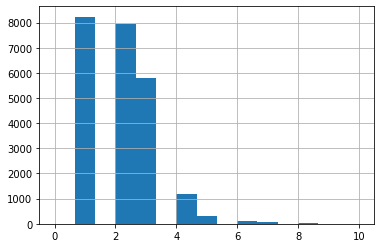

In [64]:
df['rooms'].hist(bins=15, range = (0, 10))

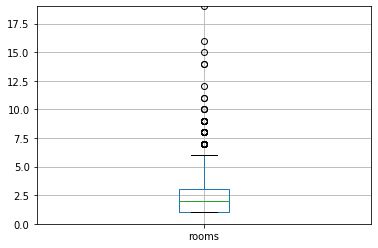

In [65]:
df.boxplot(column='rooms')
plt.ylim(0, 19)
plt.show()

Наиболее всего востребованы 1 и 2-х комнатные квартиры, что вполне соответствует ожиданиям. Максимальное число комнат в выборке - 19. 

In [66]:
df['ceiling_height'].describe()

count    23650.000000
mean         2.723497
std          0.990558
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

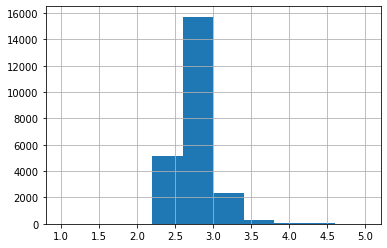

In [67]:
df['ceiling_height'].hist(bins=10, range = (1, 5))

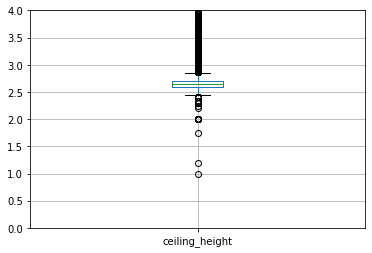

In [68]:
df.boxplot(column='ceiling_height')
plt.ylim(0, 4)
plt.show()

Высота потолков также соответствует стандартной - 2,65 м. Однако, следует обратить внимание на выбивающиеся минимальное и максимальное значения: 1 м и 100 м соответственно.

**Вывод**

На этапе исследовательского анализа данных изучены следующие параметры квартир: площадь, цена, число комнат, высота потолков. Для каждого параметра построена гистограмма (для визуализации параметра) и диаграмма размаха (для определения редких и выбивающихся значений). 

Определены следующие значения параметров, представленных в выборке квартир:
1.	площадь квартиры: минимальная – 12 кв.м, максимальная – 900 кв.м, медиана – 52 кв.м. 
2.	стоимость квадратного метра: минимальная – 112 руб./кв.м, максимальная – 1907500 руб./кв.м, медиана – 95000 руб./кв.м.
3.	количество комнат: от 1 до 19 комнат, медиана – 2 комнаты.
4.	высота потолков: от 1 до 100 м, медиана – 2.65 м.

По информации, полученной методом describe() по значениям медианы и стандартного отклонения уже отчетливо видно наличие выбивающихся и аномальных значений. Также сделать вывод о наличии выбивающихся значений можно по длинным «хвостам» построенных гистограмм. Работа по устранению редких и выбивающихся значений будет выполнена на следующем этапе. 


#### Изучение времени продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [69]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

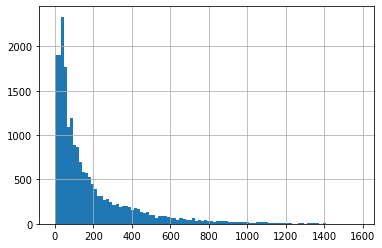

In [70]:
df['days_exposition'].hist(bins=100, range = (0, 1580))

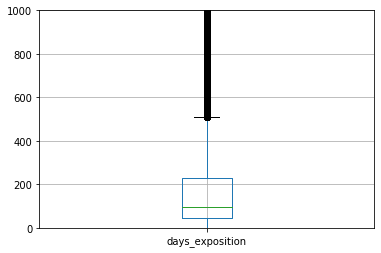

In [71]:
df.boxplot(column='days_exposition')
plt.ylim(0, 1000)
plt.show()

In [72]:
print('Количество квартир, срок продажи которых неизвестен:', 23650 - 20470)

Количество квартир, срок продажи которых неизвестен: 3180


**Вывод**

Среднее время продажи квартиры составляет 180 дней, медиана - 95 дней. Минимальное время продажи - 1 день, максимальное - 1580 дней. Также, по 3180 квартирам срок продажи неизвестен. Скорее всего, на момент формирования архива данные квартиры еще не были проданы.

На гистограмме также отчетливо видно наличие длинного "хвоста".

25% квартир были проданы в течение первых 45 дней - это хороший показатель в целом по продажам. Необычайно долги продажи определены с помощью метода boxplot() и составляют свыше 550 дней. Хотя в отдельных случаях зафиксированы продажи и после 1000 дней размещения объявления!



#### Удаление редких и выбивающихся значений

На всех построенных гистограммах отчетливо видны хвосты. На оснований ранее построенных гистограмм и диаграмм размаха исключим из данных редкие и выбивающиеся значения. Построим гистограммы показателей после исключения выбросов

Исключим из выборки квартиры:
общей площадью свыше 150 кв.м;
ценой за квадратный метр менее 25000 руб. и свыше 200000 руб.;
количеством комнат свыше 8;
высотой потолков менее 2,4 м и свыше 3 м;
сроком продажи свыше 550 дней.

In [73]:
df_clear = df.query('total_area <= 150')
df_clear = df_clear.query('price_per_square_meter > 25000 & price_per_square_meter < 200000')
df_clear = df_clear.query('rooms < 8')
df_clear = df_clear.query('ceiling_height > 2.4 & ceiling_height <= 3')
df_clear = df_clear.query('days_exposition < 550')

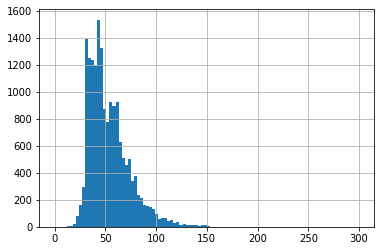

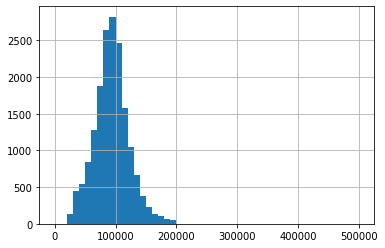

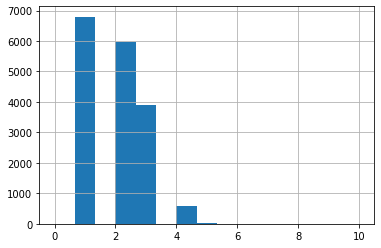

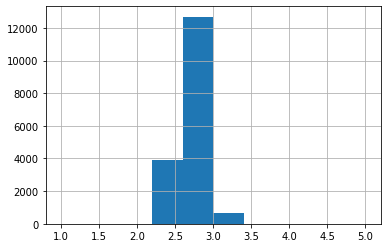

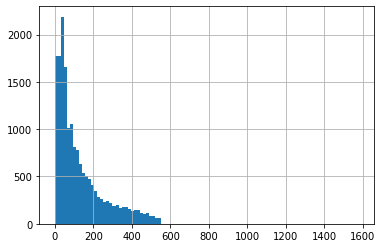

In [74]:
df_clear['total_area'].hist(bins = 100, range = (0, 300))
plt.show()
df_clear['price_per_square_meter'].hist(bins = 50, range = (0, 500000))
plt.show()
df_clear['rooms'].hist(bins=15, range = (0, 10))
plt.show()
df_clear['ceiling_height'].hist(bins=10, range = (1, 5))
plt.show()
df_clear['days_exposition'].hist(bins=100, range = (0, 1580))
plt.show()

**Вывод**

На основании построенных на предыдущем этапе гистограмм и диаграмм размаха были определены и исключены из выборки редкие, выбивающиеся и аномальные значения. Гистограммы общей площади и цены за квадратный метр стали более похожи на нормальное распределение. Это означает, что теперь представленные в выборке данные более однородны и годятся для последующего анализа и определения факторов, влияющих на стоимость квартиры.

#### Факторы, влияющие на стоимость квартиры

Определим зависимость факторов, влияющих на стоимость квартиры с помощью коэффициента корреляции Пирсона.

Зависимость цены от площади, числа комнат, удалённости от центра:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f446ec27850>,
      dtype=object)

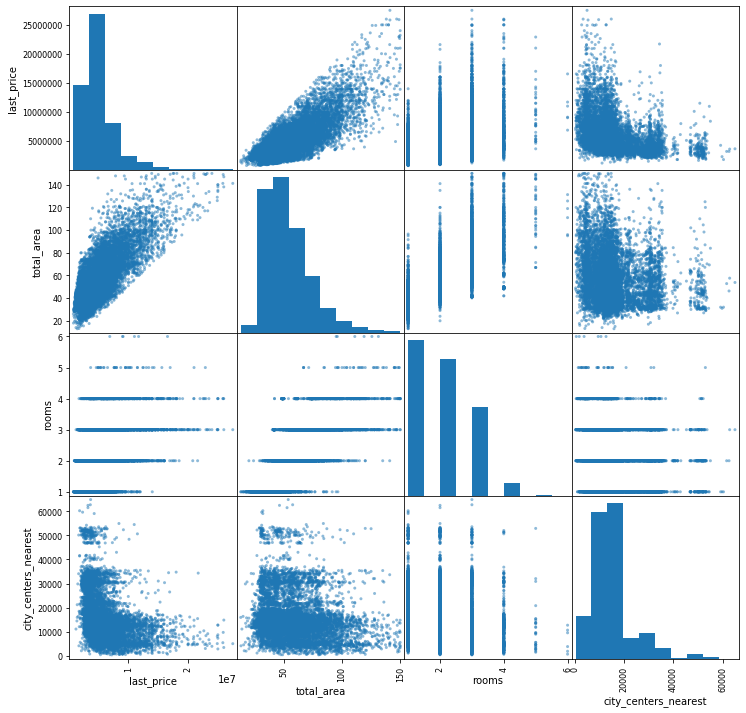

In [75]:
pd.plotting.scatter_matrix(df_clear[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize = (12, 12))

In [76]:
df_clear[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.775449,0.481771,-0.307889
total_area,0.775449,1.000000,0.792759,-0.140903
rooms,0.481771,0.792759,1.000000,-0.087224
city_centers_nearest,-0.307889,-0.140903,-0.087224,1.000000


На построенных гистограммах и из таблицы с коэффициентами корреляции Пирсона можно сделать вывод о наличии зависимости между ценой за квадратный метр и общей площадью квартиры (0.775), слабой зависимости между ценой за квадратный метр и количеством комнат (0.48) и очень слабой обратной корреляции между ценой за квадратный метр и расстоянием от центра (-0.31 - чем дальше от центра, тем дешевле, однако несущественно)

Зависимость цены от этажа квартиры:

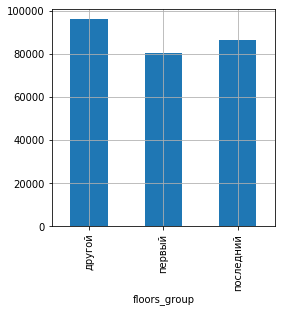

In [77]:
df_clear.groupby('floors_group')['price_per_square_meter'].agg('median').plot(kind='bar',ylim=0,grid=True,figsize=(4,4))

На основании гистограммы можно сделать вывод об отсутствии зависимости цены квартиры от этажа.

Зависимость от даты размещения: дня недели, месяца и года

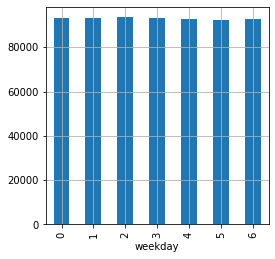

In [78]:
df_clear.groupby('weekday')['price_per_square_meter'].agg('median').plot(kind='bar', ylim=0,grid=True,figsize=(4,4))

Стоимость квадратного метра квартиры не зависит от дня недели.

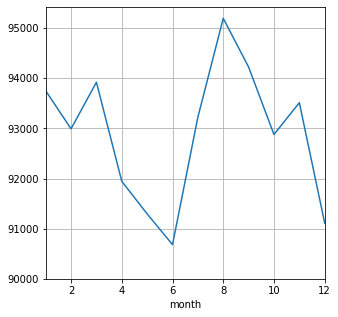

In [79]:
df_clear.groupby('month')['price_per_square_meter'].agg('median').plot(ylim=90000,grid=True,figsize=(5,5))

Наименее выгодно продавать квартиры весной и в начале лета, однако в конце лета к августу-сентябрю наблюдает рост стоимости квадратного метра. К зиме спрос нова падает и цена снижается.

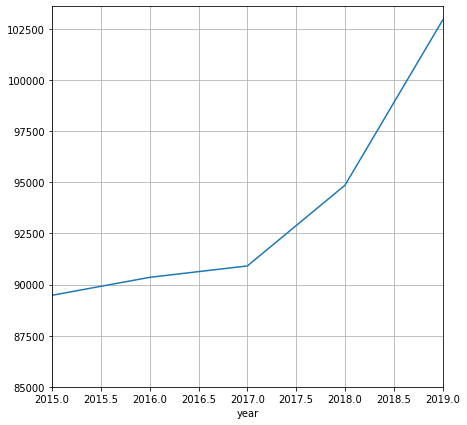

In [80]:
df_clear.groupby('year')['price_per_square_meter'].agg('median').plot(ylim=85000,grid=True,figsize=(7,7))

Наблюдается явная зависимость стоимости квартиры от года - со временем недвижимость дорожает и данная зависимость только продолжает усиливаться. Наиболее сильный рост произошел в 2017 и 2018 годах. 

**Вывод**

На данном этапе работы рассмотрено влияние различных факторов на стоимость квартиры. С помощью коэффициента корреляции Пирсона определена зависимость факторов.

Установлено наличие зависимости между стоимостью квартиры и общей площадью, слабой зависимости между стоимостью и количеством комнат. С увеличением расстояния от центра города стоимость квадратного метра снижается, однако зависимость данных факторов весьма несущественна.

Также установлено отсутствие зависимости цены квартиры от этажа и дня недели размещения объявления.

Наблюдается зависимость стоимости квартиры от сезона года - весной и в начале лета спрос минимальный, однако уже в конце лета и к осени спрос возрастает до максимальных значений, а вместе с ним и стоимость. Это можно объяснить сезоном отпусков и дачным сезоном, когда спрос на недвижимость невысокий. К осени и началу учебного года с наплывом учащихся, спрос возрастает. 

Также наблюдается выраженная зависимость стоимости жилья от года, что подтверждает популояроное суждение о том, что с течением времени стоимость недвижимости только растет.

#### 10 населённых пунктов с наибольшим числом объявлений

In [81]:
top_advert = df_clear.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=('count', 'mean', 'median')).sort_values('count', ascending = False)
top_advert.head(10)

,count,mean,median
locality_name,,,
санкт-петербург,11243.0,105651.842480,101852.0
посёлок мурино,489.0,85938.775051,86232.0
посёлок шушары,389.0,77960.375321,76125.0
всеволожск,303.0,66746.132013,65537.0
посёлок парголово,289.0,89372.515571,91250.0
колпино,285.0,74801.270175,73913.0
деревня кудрово,272.0,92602.393382,92045.0
пушкин,264.0,100084.443182,97479.0
гатчина,240.0,68730.579167,67671.5


In [82]:
top_10_advert = top_advert.query('count >= 183')
#top_10_advert

Медиана и среднее значение цены за квадратный метр во всех населенных пунктах приблизительно одинаковы, что свидетельствует об однородности представленных в выборке данных без существенных выбросов. Построим гистограмму средней стоимости с импользованием медианы.

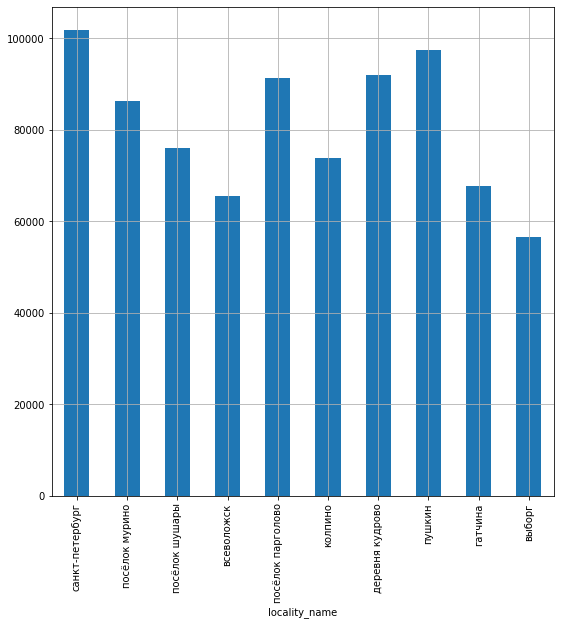

In [83]:
top_10_advert['median'].plot(kind='bar', ylim=0,grid=True,figsize=(9,9))

**Вывод**

С применением сводных таблиц определены 10 населенных пунктов с наибольшим количеством предложений по продажде квартир. На первом месте, с огромной разницей по количеству предложений, расположился г. Санкт-Петербург (11243 предложения), на 10-м - г. Выборг (183 предложения). 

Наиболее высокая средняя стоимость квадратного метра зафиксирована в г. Санкт-Петербург (101852 руб.кв.м) и в г. Пушкин (97479 руб.кв.м). Наиболее низкая стоимость - в г. Выборг (56667 руб.кв.м) и в г. Всеволжск (65537 руб.кв.м).

#### Зависимость цены квартиры в Санкт-Петербурге от удаленности от центра

In [84]:
spb_advert = df_clear.query('locality_name == "санкт-петербург"')
spb_advert = spb_advert.reset_index(drop = True)
#spb_advert.head(5)

In [85]:
spb_advert['city_centers_nearest'].isnull().sum()

14

Исключим строки с пропущенными значениями NaN:

In [86]:
spb_advert.dropna(subset=['city_centers_nearest'], inplace = True)

Переведем метры в километры, округлим до ближайшего целого значения и изменим вещественный тип данных на целочисленный:

In [87]:
spb_advert['city_centers_nearest_round'] = spb_advert['city_centers_nearest'] / 1000
spb_advert['city_centers_nearest_round'] = spb_advert['city_centers_nearest_round'].round().astype('int')
spb_advert.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floors_group,living_area_ratio,kitchen_area_ratio,city_centers_nearest_round
0,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,NaN,289.0,88525,6,2,2017,другой,0.714754,0.106557,15
1,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646,14
2,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,NaN,...,296.0,19.0,119231,5,11,2017,другой,0.525641,0.194872,14
3,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,NaN,...,NaN,168.0,104839,4,1,2017,другой,0.625806,0.180645,11
4,16,14200000,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,NaN,97.0,117355,2,1,2019,другой,0.628099,0.099174,13


In [88]:
spb_advert_median = spb_advert.pivot_table(index='city_centers_nearest_round', values='price_per_square_meter', aggfunc=('count', 'mean', 'median'))

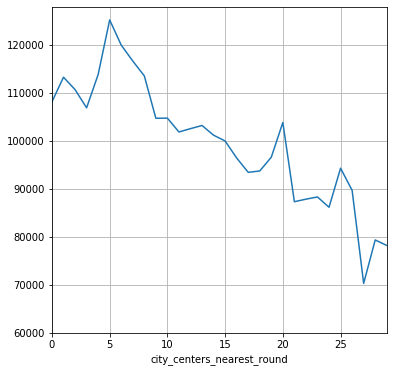

In [89]:
spb_advert_median['median'].plot(ylim=60000,grid=True,figsize=(6,6))

**Вывод**

На построенном графике видно, что чем дальше от центра Санкт-Петербурга, тем средняя стоимость квадратного метра снижается.

На расстоянии до 10 км от центра города цена за квадратный метр держится на отметке свыше 105 тыс.кв.м, после 10 км от центра - начинается резкое снижение. Таким образом, расстояние в 10 км от центра будем считать границей центральной области.

#### Изучение квартир, расположенных в центральной области г. Санкт-Петербург

Выполнение анализа следующих параметров: площадь, цена, число комнат, высота потолков

In [90]:
spb_center = spb_advert.query('city_centers_nearest_round <= 10')
spb_center = spb_center.reset_index(drop = True)
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,living_area_ratio,kitchen_area_ratio,city_centers_nearest_round
count,2932.000000,2.932000e+03,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,...,2932.000000,1755.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000
mean,9.487040,7.281604e+06,62.463728,2.156889,2.698626,9.354366,35.721033,5.199181,10.710467,0.474420,...,1.007844,496.801709,138.703956,116462.509209,2.565143,6.550136,2017.303547,0.567554,0.181437,6.862551
std,5.641408,3.670219e+06,25.355505,0.943984,0.149331,5.756008,16.809643,4.128757,5.424283,0.889508,...,1.047624,264.782847,130.765407,27904.981796,1.773277,3.425556,0.880790,0.113215,0.075890,2.508777
min,0.000000,1.686000e+06,13.200000,1.000000,2.450000,2.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,22.000000,2.000000,26250.000000,0.000000,1.000000,2015.000000,0.038462,0.000000,0.000000
25%,5.000000,4.650000e+06,43.200000,1.000000,2.600000,5.000000,20.500000,2.000000,7.500000,0.000000,...,0.000000,280.000000,41.000000,95862.250000,1.000000,3.000000,2017.000000,0.499743,0.128205,5.000000
50%,9.000000,6.406591e+06,57.000000,2.000000,2.650000,7.000000,32.000000,4.000000,9.300000,0.000000,...,1.000000,480.000000,90.000000,111557.000000,3.000000,7.000000,2017.000000,0.574057,0.163636,7.000000
75%,13.000000,8.889166e+06,78.000000,3.000000,2.800000,12.000000,45.000000,7.000000,12.300000,1.000000,...,2.000000,707.000000,200.000000,133832.500000,4.000000,10.000000,2018.000000,0.644467,0.219780,9.000000
max,35.000000,2.750000e+07,150.000000,6.000000,3.000000,28.000000,128.000000,26.000000,55.700000,5.000000,...,3.000000,1313.000000,549.000000,199557.000000,6.000000,12.000000,2019.000000,1.369925,0.681818,10.000000


In [91]:
spb_advert.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,living_area_ratio,kitchen_area_ratio,city_centers_nearest_round
count,11229.000000,1.122900e+04,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,...,11229.000000,5370.000000,11229.000000,11229.00000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000,11229.000000
mean,9.895806,5.831786e+06,55.102502,1.962063,2.651089,12.070443,31.230761,6.545641,9.864492,0.621070,...,0.679758,542.710428,127.193784,105637.41473,2.589011,6.639327,2017.344910,0.560961,0.189186,12.525069
std,5.623045,2.856765e+06,21.115033,0.898175,0.118708,6.412584,14.051659,5.018277,4.338051,0.969459,...,0.854607,278.611303,125.012916,23365.58205,1.781038,3.451755,0.863253,0.107324,0.072052,4.346706
min,0.000000,1.190000e+06,13.000000,1.000000,2.450000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,13.000000,1.000000,26250.00000,0.000000,1.000000,2015.000000,0.038462,0.000000,0.000000
25%,6.000000,3.990000e+06,40.000000,1.000000,2.600000,7.000000,18.200000,3.000000,7.000000,0.000000,...,0.000000,328.000000,36.000000,89355.00000,1.000000,3.000000,2017.000000,0.491551,0.136842,10.000000
50%,10.000000,4.999000e+06,50.000000,2.000000,2.650000,10.000000,30.000000,5.000000,9.000000,0.000000,...,0.000000,531.500000,81.000000,101831.00000,3.000000,7.000000,2017.000000,0.562500,0.177273,13.000000
75%,14.000000,6.750000e+06,65.600000,3.000000,2.700000,16.000000,40.000000,9.000000,11.000000,1.000000,...,1.000000,758.000000,178.000000,117857.00000,4.000000,10.000000,2018.000000,0.633824,0.234375,15.000000
max,50.000000,2.750000e+07,150.000000,6.000000,3.000000,52.000000,128.000000,33.000000,60.000000,5.000000,...,3.000000,1337.000000,549.000000,199557.00000,6.000000,12.000000,2019.000000,1.369925,0.787879,29.000000


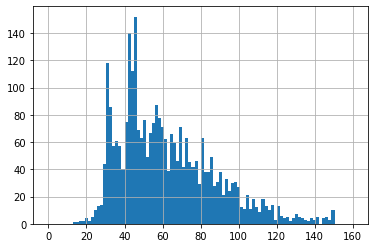

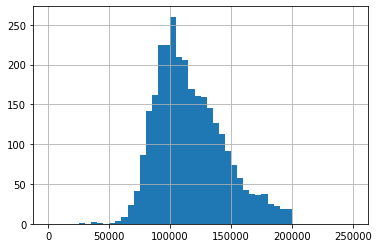

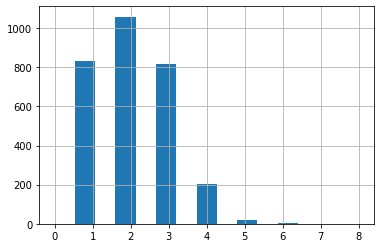

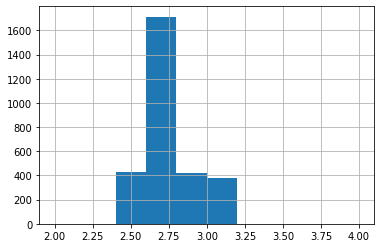

In [92]:
spb_center['total_area'].hist(bins = 100, range = (0, 160))
plt.show()
spb_center['price_per_square_meter'].hist(bins = 50, range = (0, 250000))
plt.show()
spb_center['rooms'].hist(bins=15, range = (0, 8))
plt.show()
spb_center['ceiling_height'].hist(bins=10, range = (2, 4))
plt.show()

Площадь квартир, продаваемых в центре Санкт-Петербурга, в среднем на 7 кв.м больше, чем в общем по городу. Стоимость квадратного метра в среднем в центре выше на 10000 руб. Высота потолков квартир в центре Санкт-Петербурга не отличается от квартир в общем по городу и составляет в среднем 2,65 метра. Так же обстоят дела и с количеством комнат - в центре и в общем по городу наибольшей популярностью, в среднем, пользуются двухкомнатные квартиры.

Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга (число комнат, этаж, удалённость от центра, дата размещения объявления):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44642bb650>,
      dtype=object)

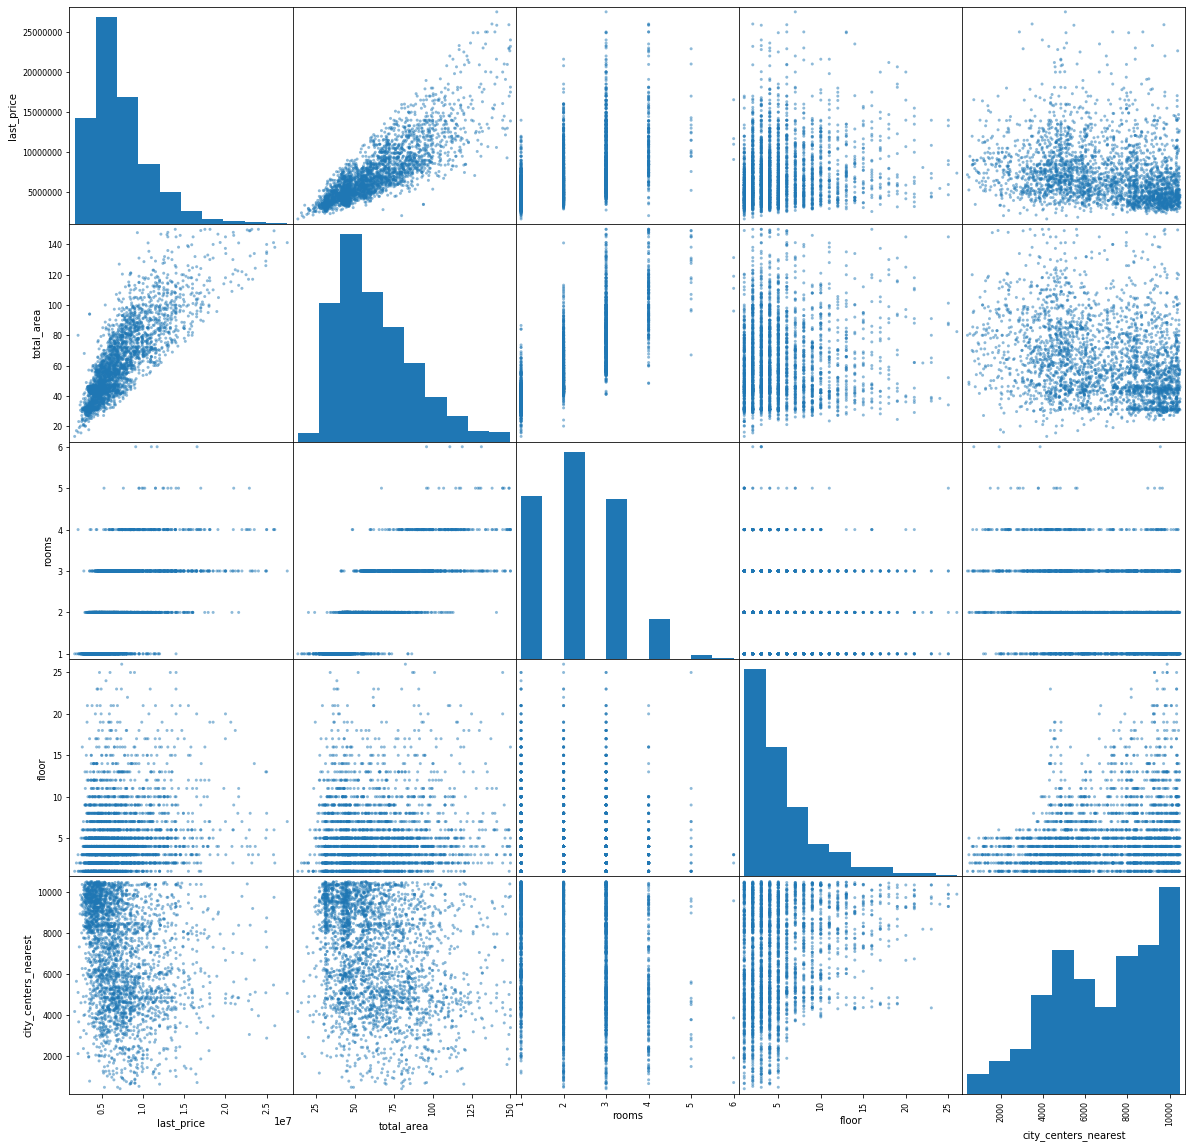

In [93]:
pd.plotting.scatter_matrix(spb_center[['last_price', 'total_area', 'rooms', 'floor', 'city_centers_nearest']], figsize = (20, 20))

In [94]:
spb_center[['price_per_square_meter', 'total_area', 'rooms', 'floor', 'city_centers_nearest']].corr()

,price_per_square_meter,total_area,rooms,floor,city_centers_nearest
price_per_square_meter,1.000000,0.009786,-0.224610,0.220100,-0.145185
total_area,0.009786,1.000000,0.794196,0.064932,-0.290405
rooms,-0.224610,0.794196,1.000000,-0.093283,-0.246623
floor,0.220100,0.064932,-0.093283,1.000000,0.252299
city_centers_nearest,-0.145185,-0.290405,-0.246623,0.252299,1.000000


**Вывод**

Площадь квартир, продаваемых в центре Санкт-Петербурга, в среднем на 7 кв.м больше, чем в общем по городу. Стоимость квадратного метра в среднем в центре выше на 10000 руб. Наибольшим спросом пользуются двухкомнатные квартиры.

Зависимости стоимости квадратного метра квартир в центре Санкт-Петербурга по некоторым факторам отличаются от зависимостей стоимости в целом по выборке:
1. Стоимость квадратного метра квартир в центре не зависит от общей площади (в целом по выборке зависимость была достаточно явной - 0.775);
2. В центре Санкт-Петербурга стоимость квадратного метра снижается при увеличении количества комнат (в целом по выборке стоимость увеличивалась);
3. Наблюдается незначительная зависимость стоимости кв.м в центре от этажа квартиры (0.22);
4. По мере удаления квартиры от центра зависимоть практически отсутствует (в целом по выборке наблюдалась слабая обратная зависимость - стоимость кв.м снижается при удалении от центра -0.31).

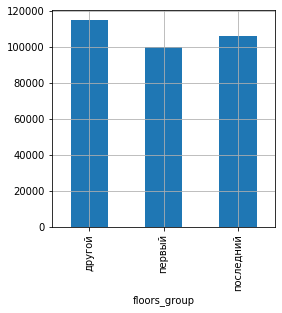

In [95]:
spb_center.groupby('floors_group')['price_per_square_meter'].agg('median').plot(kind='bar',ylim=0,grid=True,figsize=(4,4))

Стоимость кв.м в центре так же, как и в целом по выборке, не зависит от этажа расположения квартиры.

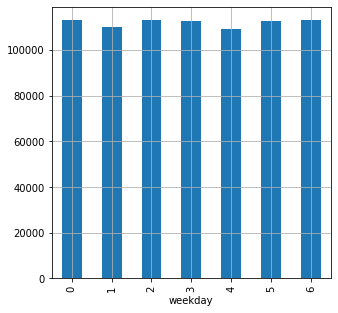

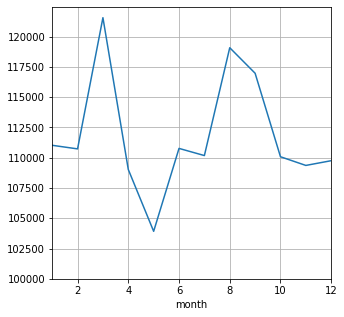

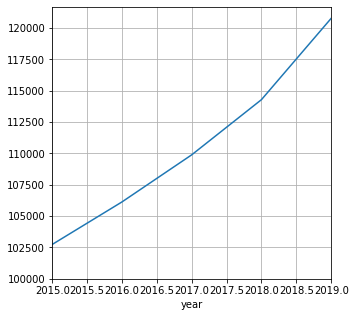

In [96]:
spb_center.groupby('weekday')['price_per_square_meter'].agg('median').plot(kind='bar', ylim=0,grid=True,figsize=(5,5))
plt.show()
spb_center.groupby('month')['price_per_square_meter'].agg('median').plot(ylim=100000,grid=True,figsize=(5,5))
plt.show()
spb_center.groupby('year')['price_per_square_meter'].agg('median').plot(ylim=100000,grid=True,figsize=(5,5))
plt.show()

**Вывод**

Стоимость квадратного метра жилья в центре Санкт-Петербурга так же, как и в целом по выборке, не зависит от дня недели размещения объявления.

Как и в целом по выборке, наименее выгодно продавать квартиры в центре весной и в начале лета; в конце лета к августу-сентябрю наблюдает рост стоимости квадратного метра. К зиме спрос снова падает и цена снижается.

Наблюдается явная зависимость стоимости квартиры от года - со временем недвижимость дорожает. Однако, в отличие от данных в целом по выборке, линия графика прямая, что означает о равномерном увеличении стоимости кв.м в течение времени.

### Шаг 5. Общий вывод

В данной проектной работе, выполненной для Заказчика — кредитного отдела банка, установлены параметры определения рыночной стоимости объектов недвижимости.
Для этого были выполнены следующие этапы:

1. Чтение файла, приведение датасета в рабочее состояние;

2. Предобработка данных - определены и заполнены пропущенные значения (количество балконов, площадь кухни, жилая площадь, количество этажей в доме), выполнено изменение типа данных (стоимость на момент продажи, количество балконов и этажей в доме, дата публикации объявления);

3. Исключение из выборки редких и выбивающихся значений (на основании построенных гистограмм и диаграмм размаха);

4. Изучено влияние параметров на стоимость квартиры в целом по выборке, определена зависимость факторов, влияющих на стоимость недвижимости: имеется зависимость между ценой за квадратный метр и общей площадью квартиры, слабая зависимость между ценой за квадратный метр и количеством комнат и очень слабая обратная корреляции между ценой за квадратный метр и расстоянием от центра. Стоимость зависит от времени года и ежегодно увеличивается в течение времени. Однако, стоимость квартиры не зависит от этажа, дня недели размещения объявления.

5. Изучено влияние параметров на стоимость квартиры в центре г. Санкт-Петербург, определена зависимость факторов, влияющих на стоимость недвижимости. Выполнено сравнение с информацией, полученной в целом по выборке: площадь квартир, продаваемых в центре Санкт-Петербурга, в среднем на 7 кв.м больше, чем в общем по городу. Стоимость квадратного метра в среднем в центре выше на 10000 руб. Наибольшим спросом, в среднем, пользуются двухкомнатные квартиры. В целом, стоимость квадратного метра в центре Санкт-Петербурга достаточно равномерна, явные зависимости от различных параметров (количество комнат, этажность, общая площадь) не обнаружены.